<a href="https://colab.research.google.com/github/rickylukman/Machine-Learning/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4/yQEmwvw8wPRdt_CQGZrKygb0qVtfSzf-ilJC0-QQhJzHyXqLiJRJrJA
untuk drive^

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [92]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/used_cars.csv')
df.shape

(20001, 26)

In [93]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


**Menghilangkan kolom yang tidak diperlukan**


In [94]:
print(df.isnull().sum())

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64


**Menghapus kolom yang tidak diperlukan dan yang missing value nya >2000**

In [0]:
df = df.drop(["id","url", "region","region_url", "condition","cylinders","odometer","title_status","vin","drive","size","type","paint_color","image_url","description","county","state"], axis = 1)

In [96]:
df.shape

(20001, 9)

In [97]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,fuel,transmission,lat,long
0,0,17899,2012.0,volkswagen,golf r,gas,manual,40.7372,-111.858
1,1,0,2016.0,ford,f-150,gas,automatic,40.5881,-111.884
2,2,46463,2015.0,gmc,sierra 1500,gas,automatic,40.5881,-111.884
3,3,0,2016.0,ford,f-150,gas,automatic,40.5881,-111.884
4,4,49999,2018.0,ford,f-450,diesel,automatic,40.3744,-104.694


**Cek data kosong/null**

In [98]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,price,year,manufacturer,model,fuel,transmission,lat,long
5,5,13999,2009.0,ram,NaN,gas,automatic,40.3744,-104.694
9,9,34500,2012.0,ram,NaN,diesel,automatic,40.3744,-104.694
14,14,14999,2004.0,ram,NaN,diesel,automatic,40.3744,-104.694
23,23,57995,NaN,NaN,olet Silverado 2500HD,NaN,automatic,33.4583,-111.926
25,25,32995,2014.0,gmc,sierra 1500,NaN,automatic,33.4583,-111.926
...,...,...,...,...,...,...,...,...,...
19845,19845,0,2015.0,NaN,KENWORTH T660,diesel,manual,46.2573,-119.082
19872,19872,0,2020.0,NaN,KENWORTH W990,diesel,manual,46.2573,-119.082
19901,19901,17,1981.0,ford,NaN,gas,manual,46.3844,-118.944
19947,19947,32500,2007.0,NaN,Freightliner Coronado,diesel,manual,46.3844,-118.944


In [99]:
print(df.isnull().sum())

Unnamed: 0         0
price              0
year              12
manufacturer     705
model            265
fuel              73
transmission     190
lat             1031
long            1031
dtype: int64


In [100]:
df.dtypes

Unnamed: 0        int64
price             int64
year            float64
manufacturer     object
model            object
fuel             object
transmission     object
lat             float64
long            float64
dtype: object

In [0]:
# Drop row yang ada missing value nya untuk yang bertype objek
df = df.dropna(subset=['manufacturer','model','fuel','transmission'])

In [102]:
print(df.isnull().sum())

Unnamed: 0        0
price             0
year              0
manufacturer      0
model             0
fuel              0
transmission      0
lat             987
long            987
dtype: int64


In [103]:
df.dtypes

Unnamed: 0        int64
price             int64
year            float64
manufacturer     object
model            object
fuel             object
transmission     object
lat             float64
long            float64
dtype: object

**Handling missing value untuk lat dan long**

In [0]:
df.lat.fillna(df.lat.mean(),inplace=True)
df.long.fillna(df.long.mean(),inplace=True)

**Encode object to int/float**

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
df['manufacturer'] = encoder.fit_transform(df['manufacturer'])
df['model'] = encoder.fit_transform(df['model'])
df['fuel'] = encoder.fit_transform(df['fuel'])
df['transmission'] = encoder.fit_transform(df['transmission'])

In [111]:
df.dtypes

Unnamed: 0        int64
price             int64
year            float64
manufacturer      int64
model             int64
fuel              int64
transmission      int64
lat             float64
long            float64
dtype: object

In [112]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,fuel,transmission,lat,long
0,0,17899,2012.0,38,1833,2,1,40.7372,-111.858
1,1,0,2016.0,12,1408,2,0,40.5881,-111.884
2,2,46463,2015.0,13,2855,2,0,40.5881,-111.884
3,3,0,2016.0,12,1408,2,0,40.5881,-111.884
4,4,49999,2018.0,12,1487,0,0,40.3744,-104.694


<Figure size 10000x10000 with 0 Axes>

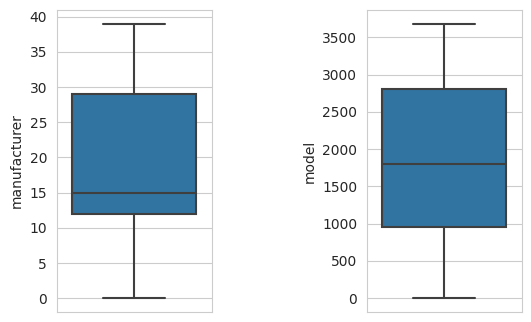

In [115]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["manufacturer"], ax=axes[0])
sns.boxplot(y=df["model"], ax=axes[1])
plt.subplots_adjust(wspace=1)

**Normalisasi Coloum**

In [0]:
# from sklearn import preprocessing

# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

**Korelasi** **antar** **data**

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

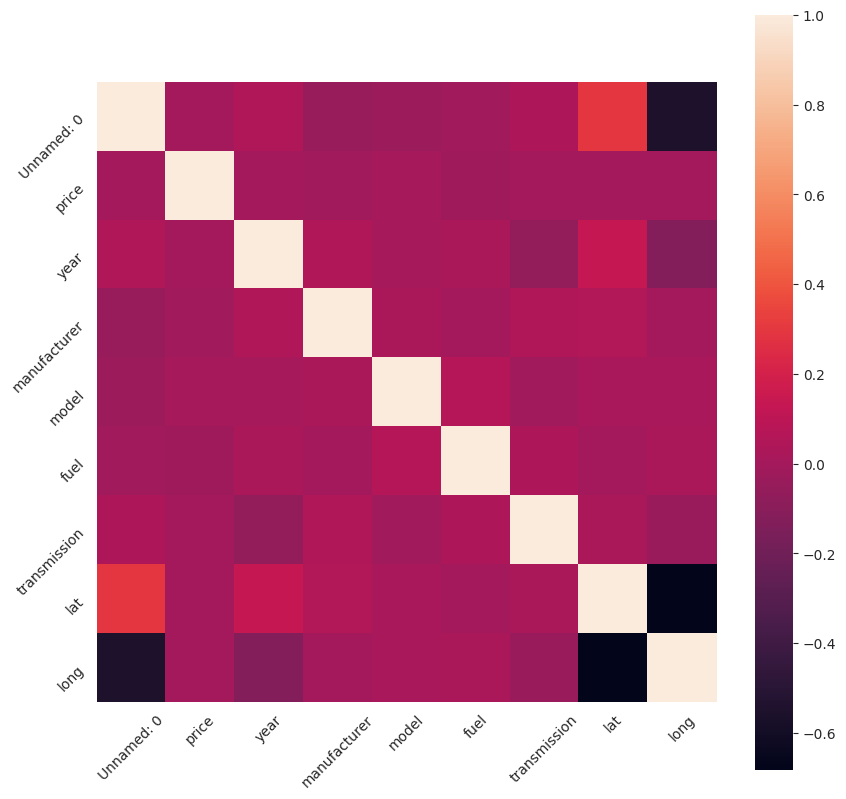

In [117]:
ambil = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ambil, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [91]:
ambil

,Unnamed: 0,price,year,manufacturer,model,fuel,transmission,lat,long
Unnamed: 0,1.000000,0.006828,0.043831,-0.044671,-0.028568,-0.004598,0.034344,0.299907,-0.565440
price,0.006828,1.000000,-0.004945,-0.007217,0.008670,-0.023196,-0.002696,-0.005032,0.002015
year,0.043831,-0.004945,1.000000,0.052795,0.014430,0.037467,-0.055337,0.137098,-0.121138
manufacturer,-0.044671,-0.007217,0.052795,1.000000,0.026526,-0.000279,0.054225,0.060134,-0.003684
model,-0.028568,0.008670,0.014430,0.026526,1.000000,0.073154,-0.008227,0.016765,0.018376
fuel,-0.004598,-0.023196,0.037467,-0.000279,0.073154,1.000000,0.035392,-0.004863,0.023448
transmission,0.034344,-0.002696,-0.055337,0.054225,-0.008227,0.035392,1.000000,0.021905,-0.034022
lat,0.299907,-0.005032,0.137098,0.060134,0.016765,-0.004863,0.021905,1.000000,-0.682279
long,-0.565440,0.002015,-0.121138,-0.003684,0.018376,0.023448,-0.034022,-0.682279,1.000000


In [0]:
df.to_csv('gdrive/My Drive/used_cars_olah.csv')